In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import json
#sc.logging.print_header()
file_path = '/work/users/mh823zote/projects/gating/data/CITEseq_Covid/' 
data_dir = file_path + 'data/' 

In [2]:
adata = sc.read_h5ad(data_dir + 'pdata_CD16_CD4_sub_denoised.h5ad')

In [3]:
sc.pp.log1p(adata)

In [4]:
cluster_string = 'CD16+ T cells'


## Joint panel


In [5]:
with open('/work/users/mh823zote/projects/gating/data/CITEseq_Covid/data/06_intersect_AB_citeseq.json', 'r') as f:
    joint_panel = json.load(f)

In [6]:
adata = adata[:,joint_panel]

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.807651     0.787456     0.797598     0.789601     0.791971
recall        0.785124     0.700413     0.685950     0.674587     0.672521
precision     0.831510     0.899204     0.952654     0.951895     0.963018


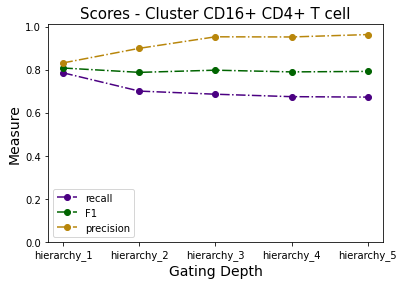

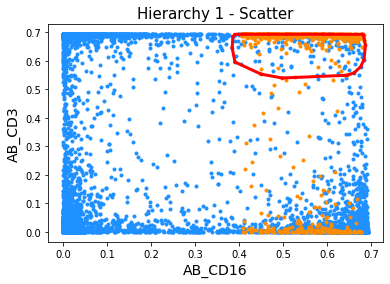

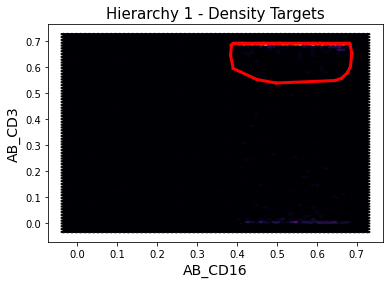

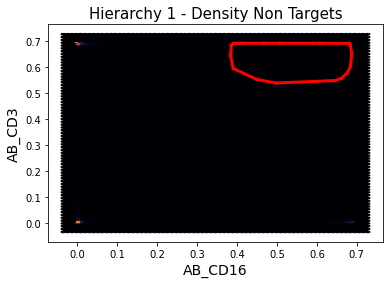

In [7]:
adata = adata.copy()
cluster_numbers = ['CD16+ CD4+ T cell']
cg.tools.gating_strategy(adata,cluster_numbers,cluster_string = cluster_string,add_noise=True)